# 反向传播
$$
\mathcal{L} = \frac{1}{2} (y-t)^2
$$

$$
y=\sigma (z)
$$

$$
z=wx+b
$$

其中，$\mathcal{L}$为损失函数，$\sigma$为激活函数，$w$为权重，$b$是偏置。

### 链式求导
$$
\frac{\partial \mathcal{L}}{\partial y} =\frac{\partial \mathcal{L}}{\partial \mathcal{L}} \frac{\partial \mathcal{L}}{\partial y}=1\cdot (y-t) 
$$

$$
\frac{\partial \mathcal{L}}{\partial z} =\frac{\partial \mathcal{L}}{\partial y} \frac{\partial y}{\partial z}=(y-t)\cdot \sigma^{\prime}(z) 
$$

$$
\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial w}=(y-t) \cdot \sigma^{\prime}(z) \cdot x
$$

$$
\frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial b}=(y-t) \cdot \sigma^{\prime}(z) \cdot 1
$$

为了方便后续的表示，$\frac{\partial \mathcal{L}}{\partial y}$ 记作 $\bar{y}$，$\frac{\partial \mathcal{L}}{\partial z}$ 记作 $\bar{z}$ , $\frac{\partial \mathcal{L}}{\partial w}$  记作 $\bar{w}$

$$
\bar y=y-t 
$$

$$
\bar z=\bar y \sigma^{\prime}(z) 
$$

$$
\bar w=\bar z x
$$

$$
\bar b=\bar z
$$


### 方向传播规律

$$
\mathcal{L}=\frac{1}{2}(y-t)^{2} \qquad   \bar{y}=y-t \qquad  \begin{gathered}
\overline{z_{2}}=(y-t) \sigma^{\prime}\left(z_{2}\right) \\
\overline{w_{2}}=\overline{z_{2}} x_{2}
\end{gathered} \qquad  \begin{gathered}
\mathcal{L}_{2}=(y-t) \sigma^{\prime}\left(z_{2}\right) \\
W_{2}=\mathcal{L}_{2} x_{2}
\end{gathered}
$$

$$
\begin{aligned}
&y=\sigma\left(z_{2}\right) \\
&z_{2}=w_{2} x_{2}
\end{aligned}  \qquad  \begin{gathered}
\overline{z_{2}}=\bar{y} \sigma^{\prime}\left(z_{2}\right) \\
\overline{w_{2}}=\overline{z_{2}} x_{2} \\
\overline{x_{2}}=\overline{z_{2}} w_{2}
\end{gathered}  \qquad \begin{gathered}
\overline{z_{1}}=\overline{z_{2}} w_{2} \sigma^{\prime}\left(z_{1}\right) \\
\overline{w_{1}}=\overline{z_{1}} x_{1}
\end{gathered} \qquad \begin{gathered}
\mathcal{L}_{1}=\mathcal{L}_{2} w_{2} \sigma^{\prime}\left(z_{1}\right) \\
\overline{w_{1}}=\mathcal{L}_{1} x_{1}
\end{gathered}
$$

$$
\begin{aligned}
&x_{2}=\sigma\left(z_{1}\right) \\
&z_{1}=w_{1} x_{1}
\end{aligned} \qquad  \begin{gathered}
\overline{z_{1}}=\overline{x_{2}} \sigma^{\prime}\left(z_{1}\right) \\
\overline{w_{1}}=\overline{z_{1}} x_{1} \\
\overline{x_{1}}=\overline{z_{1}} w_{1}
\end{gathered}\qquad  \begin{gathered}
\overline{z_{0}}=\overline{z_{1}} w_{1} \sigma^{\prime}\left(z_{0}\right) \\
\overline{w_{0}}=\overline{z_{0}} x_{0}
\end{gathered} \qquad \begin{gathered}
\mathcal{L}_{0}=\mathcal{L}_{1} w_{1} \sigma^{\prime}\left(Z_{0}\right) \\
\overline{w_{0}}=\mathcal{L}_{0} x_{0}
\end{gathered}
$$

$$
\begin{aligned}
&x_{1}=\sigma\left(z_{0}\right) \\
&z_{0}=w_{0} x_{0}
\end{aligned} \qquad \qquad \begin{gathered}
\overline{z_{0}}=\overline{x_{1}} \sigma^{\prime}\left(z_{0}\right) \\
\overline{w_{0}}=\overline{z_{0}} x_{0} \\
\overline{x_{0}}=\overline{z_{0}} w_{0}
\end{gathered}
$$


可以发现规律：

$$
\begin{aligned}
\mathcal{L}_{i}=& \mathcal{L}_{i+1} w_{i+1} \sigma^{\prime}\left(Z_{i}\right) \\
& \frac{\partial \mathcal{L}}{\partial w_{i}}=\mathcal{L}_{i} x_{i}
\end{aligned}
$$

$$
\mathcal{L}_{\text {last }}=(y-t) \sigma^{\prime}\left(z_{\text {last }}\right)
$$

### 基于numpy实现反向传播神经网络

+ 网络初始化：对各连接权重赋一个初始值，设定误差函数，设定学习率和最大学习次数。
+ 随机选取：随机选取第n个训练样本以及对应的期望输出。
+ 隐藏层计算：计算隐藏层各神经元的输入和输出。
+ 求偏导数：利用网络期望输出和实际输出，计算误差函数对输出层的各神经元的偏导数。
+ 修正输出层权值：利用输出层各神经元的偏导数和隐藏层各神经元的输出来修正输出层的权值。
+ 修正隐藏层权值：利用当前隐藏层各神经元的偏导数和输入层各神经元的输入修正当前隐藏层的权值。
+ 计算误差：用修正后的权重，计算新模型的误差。
+ 如此迭代更新。



#### 我们设计这么一个神经网络。

- 输出层的节点个数为2。
- 三个隐藏层的节点个数，从左到右，依次为：16、64、32。
- 输出层的节点个数为2，分别表示属于类别一和属于类别二的概率。
- 需要注意的是，我们这里没有用Softmax对输出值进行映射。


In [36]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [37]:
# 样本总数
N_SAMPLES = 2000
# 75%的数据用于训练，25%的数据用于测试。
TEST_SIZE = 0.25

x,y = make_moons(n_samples=N_SAMPLES,noise=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1500, 2) (1500,)
(500, 2) (500,)


####  数据集

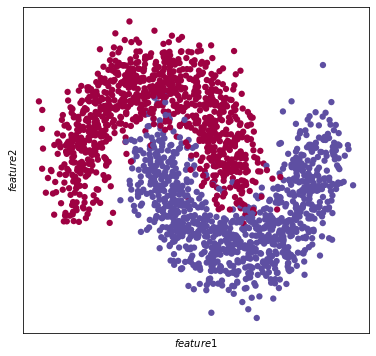

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.xticks([])
plt.yticks([])
axes = plt.gca()
axes.set(xlabel="$feature1$", ylabel="$feature2$")
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(right=0.80)
# 绘制散点图,根据标签区分颜色
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='none')
plt.show()

####  网络层

现在，我们来定义一个网络层。首先我们要知道网络层的输入是什么，输出是什么，在输出之前，可能还有一个激活函数，在激活函数之前，还有还需要用输入乘以权重加上偏置。输入乘以权重加上偏置再作为激活函数的自变量。所以，我们需要的内容有：

+ 输入节点数
+ 输出节点数
+ 激活函数类型
+ 权重
+ 偏置

In [39]:
class Layer:

    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        '''
        :param n_input: 输入节点数
        :param n_neurons: 输出节点数
        :param activation: 激活函数类型
        :param weights: 权重
        :param bias: 偏置
        '''
        
        # 输入节点数
        self.n_input = n_input
        # 输出节点数
        self.n_neurons = n_neurons
        # 激活函数类型,如’sigmoid’
        self.activation = activation
        # 通过正态分布初始化网络权值，初始化非常重要，不合适的初始化将导致网络不收敛
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons) * np.sqrt(1 / n_neurons)
        # 初始化偏置
        self.bias = bias if bias is not None else np.random.rand(n_neurons) * 0.1

        # 激活函数的输出值
        self.outputs = None
        # 用于计算当前层 delta 的中间变量
        self.error = None
        # 记录当前层的 delta 变量，给前一层计算梯度用
        self.delta = None

如示例代码所示，除了记录我们之前讨论的那5个值，我们还让全连接层额外记录了三个值。

+ outputs：输出值
+ error：用于计算当前层delta的中间变量
+ delta：记录当前层的delta

这三个值都都需要通过计算得到，我们先讨论outputs。
其计算过程如我们所讨论的，$z =  x  w + b$，然后$z$作为激活函数的自变量。

+ 阶跃函数
+ Sigmoid
+ Tanh
+ ReLU
+ LeakyReLU

其中阶跃函数，连梯度下降都没法用。这里我们实现后面四种。

In [40]:
def calculate_outputs(self,inputs):
    '''
    
    :param inputs: 输入值
    :return: 输出值，last_activation
    '''
    # x@w + b
    z = np.dot(x,self.weights) + self.bias
    # z 作为激活函数的自变量
    # 无激活函数,直接返回
    if self.activation is None:
        self.outputs = z
    # sigmoid 激活函数
    elif self.activation.lower() == 'sigmoid':
        self.outputs = 1 / (1 + np.exp(-z))
    # tanh 激活函数
    elif self.activation.lower() == 'tanh':
        self.outputs = np.tanh(z)
    # ReLU 激活函数
    elif self.activation.lower() == 'relu':
        self.outputs = np.maximum(z, 0)
    # LeakyReLU 激活函数
    # p 值 采用TensorFlow的默认P值，0.2
    elif self.activation.lower() == 'leakyrelU':
        if z >= 0:
            self.outputs = z
        else:
            self.outputs = z * 0.2
    
    return self.outputs

激活函数的梯度，这个是做反向传播的时候用的。

In [41]:
# 计算激活函数的导数
def activation_derivative(self, z):
    '''

    :param z: 激活函数的值
    :return: 导函数的值
    '''
    # 无激活函数,导数为 1
    if self.activation is None:
        return np.ones_like(z)
    # Sigmoid 的导数
    elif self.activation.lower() == 'sigmoid':
        return z * (1 - z)
    # tanh 的导数
    elif self.activation.lower() == 'tanh':
        return 1 - z ** 2
    # ReLU 的导数
    elif self.activation.lower() == 'relu':
        grad = np.array(z, copy=True)
        grad[z > 0] = 1.
        grad[z <= 0] = 0.
        return grad
    # LeakyReLU 的导数
    # p 值 采用TensorFlow的默认P值，0.2
    elif self.activation.lower() == 'leakyrelU':
        grad = np.array(z, copy=True)
        grad[z > 0] = 1.
        grad[z <= 0] = 0.2
        return grad
    
    return z

#### 网络模型

In [42]:
# 神经网络模型大类
class NeuralNetwork:
    def __init__(self):
        # 网络层列表
        self.layers = []

    # 新增网络层
    def add_layer(self, layer):
        '''

        :param layer: 网络层
        :return: 新的网络层列表
        '''
        self.layers.append(layer)

    # 删除网络层
    def remove_layer(self,layer):
        '''

        :param layer: 网络层
        :return: 新的网络层列表
        '''
        self.layers.remove(layer)

In [43]:
# 前向传播
def feed_forward(self,inputs):
    '''
    
    :param inputs: 整个神经网络的输入
    :return: 整个神经网络的输出
    '''
    # 大写的X代表矩阵
    X = inputs
    for layer in self.layers:
        X = layer.calculate_outputs(X)
    
    return X

#### 反向传播的实现

+ 计算整个神经网络的输出。
+ 分别计算输出层的$\delta$和隐藏层的$\delta$并存起来。
+ 寻找前一层的输出，即当前层的输入，将其与$\delta$相乘。这就是梯度
+ 用权重减去梯度和乘以学习率的乘积。

In [44]:
# 反向传播
def backpropagation(self,inputs,trues,lr):
    '''
    
    :param inputs: 整个神经网络的输入
    :param trues: 真实值
    :param lr: 学习率
    :return:
    '''
    # 1. 计算整个神经网络的输出。
    outputs = self.feed_forward(inputs)
    # 反向循环
    # 分别计算输出层的delta 和 隐藏层的delta并存起来。
    for i in reversed(range(len(self.layers))):
        layer = self.layers[i]
        # 计算输出层的delta
        # \delta_k^{K} = (o_k - t_k)(o_k - o_k^2)
        if layer == self.layers[-1]:
            layer.error = trues - outputs
            layer.delta = layer.error * layer.activation_derivative(outputs)
        # 隐藏层的delta
        # \delta_j^J = (o_j - o_j^2)\sum_{k = 1}^{K}\delta_k^{K} w_{jk}
        else:
            next_layer = self.layers[i+1]
            layer.error = np.dot(next_layer.weights,next_layer.delta)
            layer.delta = layer.error * layer.activation_derivative(layer.outputs)

    # 更新权重
    for i in range(len(self.layers)):
        layer = self.layers[i]
        # 寻找前一层的输出，即当前层的输入
        o_i = np.atleast_2d(inputs if i == 0 else self.layers[i-1].outputs)
        # 将其与delta相乘。这就是梯度
        grads = layer.delta * o_i.T
        layer.weights = layer.weights + grads * lr

#### 训练方法

In [45]:
def train(self, x_train, y_train, lr, max_epochs):
    """
    
    :param x_train: x 训练数据
    :param y_train: y 训练数据
    :param lr: 学习率
    :param max_epochs: 训练机的最大循环迭代次数
    :return:
    """
    # one-hot 编码
    y_onehot = np.zeros((y_train.shape[0], 2))
    y_onehot[np.arange(y_train.shape[0]), y_train] = 1
    # 训练 1000 个 epoch
    for i in range(max_epochs):
        # 一次训练一个样本
        for j in range(len(x_train)):
            self.backpropagation(x_train[j], y_onehot[j], lr)
        if i % 10 == 0:
            # 打印出 MSE Loss
            mse = np.mean(np.square(y_onehot - self.feed_forward(x_train)))
            print('Epoch: #%s, MSE: %f' % (i, float(mse)))

#### 测试方法

In [46]:
def test(self, x_test, y_test):
    """
    
    :param x_test: x 测试数据
    :param y_test: y 测试数据
    :return:
    """
    # one-hot 编码
    y_onehot = np.zeros((y_test.shape[0], 2))
    y_onehot[np.arange(y_test.shape[0]), y_test] = 1
    # 整体训练完成之后
    mse = np.mean(np.square(y_onehot - self.feed_forward(x_test)))
    print('Finish!!!, MSE: %f' % float(mse))


In [47]:
def generate_data(n_samples, test_rate, noise):
    """
    :param n_samples: 样本总数
    :param test_rate: 测试数据所占比例
    :param noise: 噪音数据
    :return:
    """
    x, y = make_moons(n_samples=n_samples, noise=noise)
    return train_test_split(x, y, test_size=test_rate)

In [48]:
x_data_train, x_data_test, y_data_train, y_data_test = generate_data(n_samples=2000, test_rate=0.25, noise=0.2)

nn = NeuralNetwork()
nn.add_layer(Layer(n_input=2, n_neurons=16, activation='sigmoid'))
nn.add_layer(Layer(n_input=16, n_neurons=64, activation='sigmoid'))
nn.add_layer(Layer(n_input=64, n_neurons=32, activation='sigmoid'))
nn.add_layer(Layer(n_input=32, n_neurons=2, activation='sigmoid'))
nn.train(x_train=x_data_train, y_train=y_data_train, lr=0.01, max_epochs=1000)
nn.test(x_test=x_data_test, y_test=y_data_test)

AttributeError: 'NeuralNetwork' object has no attribute 'train'

In [49]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


# 全连接网络层
class Layer:

    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        """
        :param n_input: 输入节点数
        :param n_neurons: 输出节点数
        :param activation: 激活函数类型
        :param weights: 权重
        :param bias: 偏置
        """
        # 输入节点数
        self.n_input = n_input
        # 输出节点数
        self.n_neurons = n_neurons
        # 激活函数类型,如’sigmoid’
        self.activation = activation
        # 通过正态分布初始化网络权值，初始化非常重要，不合适的初始化将导致网络不收敛
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons) * np.sqrt(1 / n_neurons)
        # 初始化偏置
        self.bias = bias if bias is not None else np.random.rand(n_neurons) * 0.1

        # 激活函数的输出值
        self.outputs = None
        # 用于计算当前层 delta 的中间变量
        self.error = None
        # 记录当前层的 delta 变量，给前一层计算梯度用
        self.delta = None

    def calculate_outputs(self, inputs):
        """
        :param inputs: 输入值
        :return: 输出值，last_activation
        """
        # x@w + b
        z = np.dot(inputs, self.weights) + self.bias
        # z 作为激活函数的自变量
        # 无激活函数,直接返回
        if self.activation is None:
            self.outputs = z
        # sigmoid 激活函数
        elif self.activation.lower() == 'sigmoid':
            self.outputs = 1 / (1 + np.exp(-z))
        # tanh 激活函数
        elif self.activation.lower() == 'tanh':
            self.outputs = np.tanh(z)
        # ReLU 激活函数
        elif self.activation.lower() == 'relu':
            self.outputs = np.maximum(z, 0)
        # LeakyReLU 激活函数
        # p 值 采用TensorFlow的默认P值，0.2
        elif self.activation.lower() == 'leakyrelU':
            if z >= 0:
                self.outputs = z
            else:
                self.outputs = z * 0.2

        return self.outputs

    # 计算激活函数的导数
    def activation_derivative(self, z):
        """
        :param z: 激活函数的值
        :return: 导函数的值
        """
        # 无激活函数,导数为 1
        if self.activation is None:
            return np.ones_like(z)
        # Sigmoid 的导数
        elif self.activation.lower() == 'sigmoid':
            return z * (1 - z)
        # tanh 的导数
        elif self.activation.lower() == 'tanh':
            return 1 - z ** 2
        # ReLU 的导数
        elif self.activation.lower() == 'relu':
            grad = np.array(z, copy=True)
            grad[z > 0] = 1.
            grad[z <= 0] = 0.
            return grad
        # LeakyReLU 的导数
        # p 值 采用TensorFlow的默认P值，0.2
        elif self.activation.lower() == 'leakyrelU':
            grad = np.array(z, copy=True)
            grad[z > 0] = 1.
            grad[z <= 0] = 0.2
            return grad

        return z


# 神经网络模型
class NeuralNetwork:
    def __init__(self):
        # 网络层列表
        self.layers = []

    # 新增网络层
    def add_layer(self, layer):
        """
        :param layer: 网络层
        :return: 新的网络层列表
        """
        self.layers.append(layer)

    # 删除网络层
    def remove_layer(self, layer):
        """
        :param layer: 网络层
        :return: 新的网络层列表
        """
        self.layers.remove(layer)

    # 前向传播
    def feed_forward(self, inputs):
        """
        :param inputs: 整个神经网络的输入
        :return: 整个神经网络的输出
        """
        # 大写的X代表矩阵
        X = inputs
        for layer in self.layers:
            X = layer.calculate_outputs(X)

        return X

    # 反向传播
    def backpropagation(self, inputs, trues, lr):
        """
        :param inputs: 整个神经网络的输入
        :param trues: 真实值
        :param lr: 学习率
        :return:
        """
        # 1. 计算整个神经网络的输出。
        outputs = self.feed_forward(inputs)
        # 反向循环
        # 分别计算输出层的delta 和 隐藏层的delta并存起来。
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            # 计算输出层的delta
            # \delta_k^{K} = (o_k - t_k)(o_k - o_k^2)
            if layer == self.layers[-1]:
                layer.error = trues - outputs
                layer.delta = layer.error * layer.activation_derivative(outputs)
            # 隐藏层的delta
            # \delta_j^J = (o_j - o_j^2)\sum_{k = 1}^{K}\delta_k^{K} w_{jk}
            else:
                next_layer = self.layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.activation_derivative(layer.outputs)

        # 更新权重
        for i in range(len(self.layers)):
            layer = self.layers[i]
            # 寻找前一层的输出，即当前层的输入
            o_i = np.atleast_2d(inputs if i == 0 else self.layers[i - 1].outputs)
            # 将其与delta相乘。这就是梯度
            grads = layer.delta * o_i.T
            layer.weights = layer.weights + grads * lr

    # 网络训练函数
    def train(self, x_train, y_train, lr, max_epochs):
        """
        :param x_train: x 训练数据
        :param y_train: y 训练数据
        :param lr: 学习率
        :param max_epochs: 训练机的最大循环迭代次数
        :return:
        """
        # one-hot 编码
        y_onehot = np.zeros((y_train.shape[0], 2))
        y_onehot[np.arange(y_train.shape[0]), y_train] = 1
        # 训练 1000 个 epoch
        for i in range(max_epochs):
            # 一次训练一个样本
            for j in range(len(x_train)):
                self.backpropagation(x_train[j], y_onehot[j], lr)
            if i % 10 == 0:
                # 打印出 MSE Loss
                mse = np.mean(np.square(y_onehot - self.feed_forward(x_train)))
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))

    def test(self, x_test, y_test):
        """
        :param x_test: x 测试数据
        :param y_test: y 测试数据
        :return:
        """
        # one-hot 编码
        y_onehot = np.zeros((y_test.shape[0], 2))
        y_onehot[np.arange(y_test.shape[0]), y_test] = 1
        # 整体训练完成之后
        mse = np.mean(np.square(y_onehot - self.feed_forward(x_test)))
        print('Finish!!!, MSE: %f' % float(mse))


def generate_data(n_samples, test_rate, noise):
    """
    :param n_samples: 样本总数
    :param test_rate: 测试数据所占比例
    :param noise: 噪音数据
    :return:
    """
    x, y = make_moons(n_samples=n_samples, noise=noise)
    return train_test_split(x, y, test_size=test_rate)


if __name__ == '__main__':
    x_data_train, x_data_test, y_data_train, y_data_test = generate_data(n_samples=2000, test_rate=0.25, noise=0.2)

    nn = NeuralNetwork()
    nn.add_layer(Layer(n_input=2, n_neurons=16, activation='sigmoid'))
    nn.add_layer(Layer(n_input=16, n_neurons=64, activation='sigmoid'))
    nn.add_layer(Layer(n_input=64, n_neurons=32, activation='sigmoid'))
    nn.add_layer(Layer(n_input=32, n_neurons=2, activation='sigmoid'))
    nn.train(x_train=x_data_train, y_train=y_data_train, lr=0.01, max_epochs=1000)
    nn.test(x_test=x_data_test, y_test=y_data_test)

Epoch: #0, MSE: 0.250269
Epoch: #10, MSE: 0.177587
Epoch: #20, MSE: 0.099055
Epoch: #30, MSE: 0.092970
Epoch: #40, MSE: 0.092536
Epoch: #50, MSE: 0.092449
Epoch: #60, MSE: 0.092398
Epoch: #70, MSE: 0.092352
Epoch: #80, MSE: 0.092311
Epoch: #90, MSE: 0.092274
Epoch: #100, MSE: 0.092241
Epoch: #110, MSE: 0.092210
Epoch: #120, MSE: 0.092181
Epoch: #130, MSE: 0.092152
Epoch: #140, MSE: 0.092120
Epoch: #150, MSE: 0.092084
Epoch: #160, MSE: 0.092039
Epoch: #170, MSE: 0.091983
Epoch: #180, MSE: 0.091908
Epoch: #190, MSE: 0.091809
Epoch: #200, MSE: 0.091675
Epoch: #210, MSE: 0.091496
Epoch: #220, MSE: 0.091259
Epoch: #230, MSE: 0.090957
Epoch: #240, MSE: 0.090582
Epoch: #250, MSE: 0.090131
Epoch: #260, MSE: 0.089596
Epoch: #270, MSE: 0.088962
Epoch: #280, MSE: 0.088199
Epoch: #290, MSE: 0.087256
Epoch: #300, MSE: 0.086059
Epoch: #310, MSE: 0.084523
Epoch: #320, MSE: 0.082619
Epoch: #330, MSE: 0.080411
Epoch: #340, MSE: 0.078005
Epoch: #350, MSE: 0.075586
Epoch: #360, MSE: 0.073375
Epoch: #370,